In [1]:
#INITIALISATIE
import random as random
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
#Make P,Q
def MakePQ(k0, DGmin, Dpam, N, MM, Da, Di, Dc):
    P = [0,k0*exp(-(DGmin-Dpam))]
    for n in range(2,N):
        if n in MM:
            P.append(k0*exp(-(DGmin-Da+Di)))
        else:
            P.append(k0*exp(-(DGmin-Da)))
    P[-1] = P[-1]*exp(-Dc)

    Q = k0*exp(-DGmin)
    
#    print P
#    print Q
    return P,Q

In [3]:
#FUNCTIONS IN TERMS OF P,Q

def phi(x,P,Q):
    res = 1.
    for j in range(1,x+1):
        res = res*(float(Q)/P[j])
    return res

def phiD(Up,Low,P,Q):
    res = 1.
    for j in range(Low+1, Up+1):
        res = res*(float(Q)/P[j])
    return res

def Lambdaf(y,N,P,Q):
    num = 0
    den = 0
    for x in range(y):
        num = num + phi(x,P,Q)
    for xi in range(N):
        den = den + phi(xi,P,Q)
    res = num/den
    return res

def tauubE(N,P,Q):
    sumT = 0
    sumN = 0
    for x in range(0,N):
        sumN = sumN + phi(x,P,Q)
        for i in range(0,x):
            Lambdaxi = 1-Lambdaf(x-i,N,P,Q)
            sumT = sumT + phiD(x,x-i,P,Q)*(1./P[x-i])*Lambdaxi
    Lambda1 = 1-Lambdaf(1,N,P,Q)
    res = sumT/(sumN*Lambda1)
    return res

In [4]:
#CONSTANTS
N = 21         #Length state space/ Position of second absorber/cleavage
M = 50        #Aantal combinaties van parameters

Dpam = .5       #Delta PAM
Da = 1         #Delta C
Di = 4         #Delta I
Dc = 3         #Delta clv

k0 = 1         #Constante in p,q
DGmin = .0     #Delta G^-

In [5]:
seed1 = [0]
mx1 = [0]
m1 = []
D1 = []

for n in range(M):
    print n
    ubtime1 = []
    Dpam1 = np.random.randint(1,10)
    Di = 5*random.random()+2
    Da = .8*random.random()+.2
    Dc = 0
    
    for x in range(2,N): 
        MM = [x]                                                 #For two mismatches, use MM = [x-1,x]
        P,Q = MakePQ(k0, DGmin, Dpam1, N, MM, Da, Di, Dc)
        ubtime1.append(tauubE(N,P,Q))
   
    m1.append(max(ubtime1))
    nmax1 = ubtime1.index(max(ubtime1))+2
    nseed1 = 1+(Di-Dpam1)/Da
    seed1.append(nseed1)
    mx1.append(nmax1)
    D1.append([[Dpam1,Da,Di,Dc],nseed1,nmax1])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


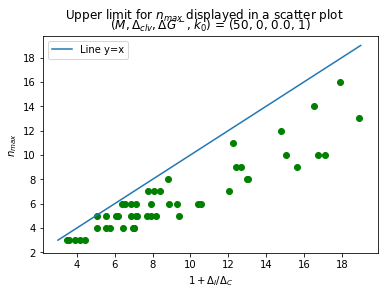

50


In [6]:
#Plot di/dc vs. nmax
frac = []
nmax = []
x = range(3,20)

for n in range(len(D1)):
    el = D1[n]
    frac.append(1+el[0][2]/el[0][1])
    nmax.append(el[2])
    #print frac[n], nmax[n]
    
plt.plot(x,x, label="Line y=x")
plt.scatter(frac, nmax, color='g')
plt.suptitle("Upper limit for $n_{max}$ displayed in a scatter plot")
subtitle = '($M, \Delta_{clv},\Delta G^-, k_0$) = ' + str((len(D1), Dc, DGmin, k0))
plt.title(subtitle)
plt.ylabel("$n_{max}$")
plt.xlabel("$1+\Delta_I/\Delta_C$")
plt.legend()
plt.savefig('..\..\Afbeeldingen\SingleMM\Nmax', bbox_inches = 'tight', dpi = 300)
plt.show()
    
    
print len(D1)